#Import

In [1]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/data-retail
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
# %cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Mounted at /content/drive
/content/drive/MyDrive/data-retail


In [2]:
import os, warnings, random

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model, callbacks
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import joblib
from keras.models import load_model

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

#Preprocessing

In [4]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [5]:
# get unique kategori value

group_kategori2016 = df2016.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2020 = df2020.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2021 = df2021.groupby('kodekategori')['kategori'].unique().reset_index()

# pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019]
pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]

new_kategori = pd.concat(pdList).reset_index(drop=True)
new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
new_kategori['kategori'] = new_kategori['kategori'].astype(str)

clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [6]:
display(clean_kategori.T)

0                  1                            2    \
kodekategori          101.00             102.00                       103.00   
kategori      ['Baby Needs']  ['Mens Care (2)']  ['Healt & Beauty Care (3)']   

                            3                 4              5    \
kodekategori             104.00            105.00         106.00   
kategori      ['Kids Care (4)']  ['Cleaning (5)']  ['Homes (6)']   

                                         6                   7    \
kodekategori                          107.00              108.00   
kategori      ['Electronic & Tool kits (7)']  ['Automotive (8)']   

                             8              9                10   \
kodekategori              109.00         110.00           111.00   
kategori      ['Stationery (9)']  ['Toys (10)']  ['Sports (11)']   

                                   11                   12   \
kodekategori                    112.00               113.00   
kategori      ['Event Equipment (12)']  ['Convection (13)']   

                                   13                      14            15   \
kodekategori                    114.00                  115.00        201.00   
kategori      ['Shoes & Sandals (14)']  ['Bag & Luggage (15)']  ['Food (1)']   

                           16                17                 18   \
kodekategori            202.00            203.00             204.00   
kategori      ['Beverage (2)']  ['Medicine (3)']  ['Pets food (4)']   

                            19                  20              21   \
kodekategori             205.00              206.00          301.00   
kategori      ['Cigarette (5)']  ['Fresh Food (6)']  ['Others (1)']   

                                22                            23   \
kodekategori                 302.00                      10101.00   
kategori      ['alisha collection']  ['Makanan Bayi (Baby Food)']   

                                          24                     25   \
kodekategori                         10102.00               10103.00   
kategori      ['Bahan Kue (Baking Supplies)']  ['Biskuit (Biscuit)']   

                                          26                            27   \
kodekategori                         10104.00                      10105.00   
kategori      ['Roti dan Kue (Bread & Cake)']  ['Sarapan Pagi (Breakfast)']   

                                                    28   \
kodekategori                                   10106.00   
kategori      ['Penganan Permen (Candy Confectionary)']   

                                                        29   \
kodekategori                                       10107.00   
kategori      ['Penganan Coklat (Chocolate Confectionary)']   

                                        30       31   \
kodekategori                       10108.00 10109.00   
kategori      ['Makanan Mentah (Raw Food)']  ['Ice']   

                                          32                           33   \
kodekategori                         10110.00                     10111.00   
kategori      ['Makanan Masak (Cooked Food)']  ['Bumbu Dapur (Seasoning)']   

                           34         35                          36   \
kodekategori          10112.00   10113.00                    10114.00   
kategori      ['Mie (Noodle)']  ['Pasta']  ['Makanan Ringan (Snack)']   

                           37                       38                39   \
kodekategori          10115.00                 10116.00          10117.00   
kategori      ['Beras (Rice)']  ['Biji-bijian (Seeds)']  ['Gula (Sugar)']   

                             40                               41   \
kodekategori            10118.00                         10119.00   
kategori      ['Tepung (Flour)']  ['Minyak Goreng (Cooking Oil)']   

                                           42                            43   \
kodekategori                          10120.00                      10121.00   
kategori      ['Makanan Kaleng (Canned Food)']  ['Makan

In [7]:
# initiate the kategori list that will removed from dataset

kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Beku (Frozen)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)", "Daging Merah (Red Meat)", "Daging Putih (White Meat)"]
kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20503.00", "20504.00", "20601.00", "20301.00", "20302.00"]

In [8]:
kategori_name_df = pd.DataFrame(kategori_remove_name)
# kategori_name_df.to_csv('kategori_delist.csv', index=False)

In [9]:
# drop unnecessary column
df2017 = df2017.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2020 = df2020.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2021 = df2021.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [10]:
# concat 3 dataframe to single df
df = pd.concat([df2017, df2018, df2019, df2020, df2021]).reset_index(drop=True)

In [11]:
# remove strange value in each rows from barcode column

df['barcode'] = df['barcode'].str.split(' ').str[0]

In [12]:
# create new column named "month_year" to get number of month and year
df['month_year'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [13]:
# transform the value to number of month from all rows

# 2017-2021
df['month_year'] = df['month_year'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})

In [14]:
# df['satuan'].unique()
satuan_non_kg = ['PCS', 'BDD', 'BTL', 'PAK', 'DUS', 'KLG', 'PSG', 'BKS', 'BOX', 'IKAT', 'SET', 'BDT', 'PACK', 'BAG', 'TPL', 'PPL', 'CAN',
                  'pcs', 'PS', 'CAPS', 'SCHT', 'REF', 'PCH', 'ROLL', 'KTK', 'ROL', 'TPLS', 'PKT', 'PUMP', 'MTR', 'POUCH', 'NET', 'SSR', 'LBR', 'pack',
                  'PCK', 'TAB', 'RTG', 'JAR', 'SCH', 'PCA', 'HGR', 'SLOP', 'BDD/12', 'TBL', 'PC', 'STL', 'JRG', 'BTL ', 'BH', 'BND', 'PSNG', 'PSC',
                  'MT', 'PET', 'P', 'ZAK', 'PDG', 'GLN']
satuan_kg = ['KG']

In [15]:
# drop unnecessary kategori
# df = df[~df['kategori'].isin(kategori_remove_name)].reset_index(drop=True)
# df_removed = df[~df['kategori'].isin(kategori_remove_name)].reset_index(drop=True)
# df_non_kg = df[df['satuan'].isin(satuan_non_kg)].reset_index(drop=True)
# df_kg = df[df['satuan'].isin(satuan_kg)].reset_index(drop=True)

In [16]:
display(df.info())
display(df.head())
# RangeIndex: 12352897 entries, 0 to 12352896 sebelum hapus daftar kategori #tambahin kolom nama
# RangeIndex: 11522540 entries, 0 to 11522539 setelah hapus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12352897 entries, 0 to 12352896
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   namabarang    object        
 2   satuan        object        
 3   qty           float64       
 4   barcode       object        
 5   kodejenis     object        
 6   jenis         object        
 7   kodekategori  float64       
 8   kategori      object        
 9   month_year    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 942.5+ MB


None

tgl                      namabarang satuan  qty  \
0 2017-10-08 10:21:56.667    SHINZUI SOAP REGULAR75GR*144    PCS 2.00   
1 2017-06-10 15:14:28.343                    KOL PUTIH/KG     KG 0.19   
2 2017-09-18 20:38:05.290  PASEO SMART TOILET WHT 6143*64    PCS 1.00   
3 2017-02-03 19:58:25.060   POND'S WB NIGHT CREAM 20GR/48    PCS 1.00   
4 2017-05-27 15:44:34.500  INDOMIE RASA SOTO SPESIAL 75GR    PCS 2.00   

         barcode kodejenis                       jenis  kodekategori  \
0  8992946511790     10301               Bath Care (1)        103.00   
1       00172677     20607               Vegetable (7)        206.00   
2  8993053211672     10507         Tissue & Cotton (7)        105.00   
3  8999999056872     10302  Cosmetic & Accessories (2)        103.00   
4   089686910384     20113         Noodle & Pasta (13)        201.00   

                  kategori  month_year  
0  Healt & Beauty Care (3)           9  
1           Fresh Food (6)           5  
2             Cleaning (5)           8  
3  Healt & Beauty Care (3)           1  
4                 Food (1)           4

In [17]:
train_monthly = df[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt > 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

month_year kodejenis        barcode  qty_cnt  qty_cnt_month
0           0     10101  4902430600859     2.00            NaN
1           0     10101  4902430601191     4.00           2.00
2           0     10101  4902430601238     4.00           1.00
3           0     10101  4902430601245     8.00            NaN
4           0     10101  4902430601320     1.00           1.00

In [18]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_year   barcode kodejenis    0     1     2     3     4     5     6     7  \
0           00100809  01011601 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1           00100809     20604 8.04 10.89 15.34 14.70 15.63 20.85 11.92 16.73   
2           00113731  02020101 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3           00113731     20607 1.51  0.00  0.00  0.00  0.00  0.00  0.00  1.49   
4           00125789  02010120 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

month_year     8     9    10    11    12    13    14    15    16    17    18  \
0           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1          14.30 14.26 11.93 11.39 14.40 12.55 20.04 15.83 14.22 19.72 20.78   
2           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
4           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

month_year    19    20    21    22    23    24    25    26    27   28   29  \
0           0.00  0.00  0.00  0.00  0.00 18.69 15.35 20.38 13.80 7.03 8.72   
1          19.90 12.00 11.78 14.68 14.05  0.00  0.00  0.00  0.00 0.00 0.00   
2           0.00  0.00  0.00  0.00  0.00  0.00  0.00  2.60  3.46 4.43 4.75   
3           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00 0.00   
4           0.00  0.00  0.00  0.00  0.00  0.72  0.00  0.00  0.00 0.00 9.06   

month_year    30    31    32   33    34    35    36    37    38    39    40  \
0          11.13 11.36 16.29 7.11 10.22 11.02 12.75 10.78 27.13 32.93 18.57   
1           0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2           6.09  4.07  5.42 4.27  4.89  3.76  3.62  2.89  3.61  0.76  0.00   
3           0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
4           0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

month_year    41    42    43   44   45   46   47   48   49   50   51   52  \
0          11.34 13.62 12.14 8.19 4.22 2.76 3.97 7.23 3.75 5.23 5.37 4.12   
1           0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2           0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3           0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4           0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

month_year   53   54   55   56   57   58   59  
0          2.11 2.75 5.56 4.12 3.13 1.68 3.59  
1          0.00 0.00 0.00 0.00 0.00 0.00 0.00  
2          0.00 0.95 0.75 0.78 0.45 1.72 0.32  
3          0.00 0.00 0.00 0.00 0.00 0.00 0.00  
4          0.00 0.00 0.00 0.00 0.00 0.00 0.00

In [19]:
monthly_series_drop = monthly_series.drop(['kodejenis'], axis=1)

In [20]:
summed_data = monthly_series_drop.groupby('barcode').agg('sum').reset_index(False)
summed_data.head()
# 59-13

month_year   barcode    0     1     2     3     4     5     6     7     8  \
0           00100809 8.04 10.89 15.34 14.70 15.63 20.85 11.92 16.73 14.30   
1           00113731 1.51  0.00  0.00  0.00  0.00  0.00  0.00  1.49  0.00   
2           00125789 0.00  0.00  0.00  0.00  6.52  0.00 30.61  1.15  0.00   
3           00129213 0.00 38.54 15.94 11.55  0.00  0.00  0.00  0.00  1.40   
4           00133142 0.00  4.19  6.89  0.00  0.00  0.00  0.00  3.46  0.00   

month_year     9    10    11    12    13    14    15    16    17    18    19  \
0          14.26 11.93 11.39 14.40 12.55 20.04 15.83 14.22 19.72 20.78 19.90   
1           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2           0.00  1.27 24.00  0.00  0.00  0.00  0.84  0.67 23.76  7.98 21.34   
3           0.00 34.27 20.00  8.27  1.42  0.00  0.00  0.00  0.00  0.63  0.00   
4           0.00  0.00  0.00  0.00  0.00 10.13 24.48  2.14  0.00  0.00  0.00   

month_year    20    21    22    23    24    25    26    27    28   29    30  \
0          12.00 11.78 14.68 14.05 18.69 15.35 20.38 13.80  7.03 8.72 11.13   
1           0.00  0.00  0.00  0.00  0.00  0.00  2.60  3.46  4.43 4.75  6.09   
2           0.00 18.12  0.00  1.40  0.72  0.00  0.00  0.00  0.00 9.06  0.00   
3           0.00  5.38 31.02 22.49  7.61 15.97 10.74  6.98 10.05 0.00  0.00   
4           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00   

month_year    31    32   33    34    35    36    37    38    39    40    41  \
0          11.36 16.29 7.11 10.22 11.02 12.75 10.78 27.13 32.93 18.57 11.34   
1           4.07  5.42 4.27  4.89  3.76  3.62  2.89  3.61  0.76  0.00  0.00   
2           0.00  0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3           0.00  0.00 0.00 17.51  0.00  0.00  0.00  5.13  0.60  2.79  8.18   
4           0.00  0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

month_year    42    43   44   45   46   47    48   49   50   51   52   53  \
0          13.62 12.14 8.19 4.22 2.76 3.97  7.23 3.75 5.23 5.37 4.12 2.11   
1           0.00  0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00   
2           0.00  0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00   
3           0.00  0.00 0.00 4.83 7.70 1.50 38.39 0.00 1.95 0.40 0.00 0.00   
4           0.00  0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00   

month_year   54   55   56   57   58   59  
0          2.75 5.56 4.12 3.13 1.68 3.59  
1          0.95 0.75 0.78 0.45 1.72 0.32  
2          0.00 0.00 0.00 0.00 0.00 0.00  
3          0.00 0.00 0.00 0.00 0.00 0.00  
4          0.00 0.00 0.00 0.00 0.00 0.00

# bs8_fm33

In [21]:
first_month = 33
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set (416515, 12)
Validation set (46280, 12)
Train set reshaped (416515, 12, 1)
Validation set reshaped (46280, 12, 1)


In [22]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
52065/52065 - 360s - loss: 21.4611 - accuracy: 0.6023 - val_loss: 19.2438 - val_accuracy: 0.6013 - 360s/epoch - 7ms/step
Epoch 2/1000
52065/52065 - 363s - loss: 20.1844 - accuracy: 0.6020 - val_loss: 19.1352 - val_accuracy: 0.6085 - 363s/epoch - 7ms/step
Epoch 3/1000
52065/52065 - 374s - loss: 20.0913 - accuracy: 0.6020 - val_loss: 19.0676 - val_accuracy: 0.6040 - 374s/epoch - 7ms/step
Epoch 4/1000
52065/52065 - 365s - loss: 20.0445 - accuracy: 0.6041 - val_loss: 19.0147 - val_accuracy: 0.6165 - 365s/epoch - 7ms/step
Epoch 5/1000
52065/52065 - 371s - loss: 20.0158 - accuracy: 0.6059 - val_loss: 19.0073 - val_accuracy: 0.5990 - 371s/epoch - 7ms/step
Epoch 6/1000
52065/52065 - 366s - loss: 20.0014 - accuracy: 0.6060 - val_loss: 19.0295 - val_accuracy: 0.6176 - 366s/epoch - 7ms/step
Epoch 7/1000
52065/52065 - 368s - loss: 19.9844 - accuracy: 0.6067 - val_loss: 19.0017 - val_accuracy: 0.6021 - 368s/epoch - 7ms/step
Epoch 8/1000
52065/52065 - 360s - loss: 19.9590 - accuracy: 0.

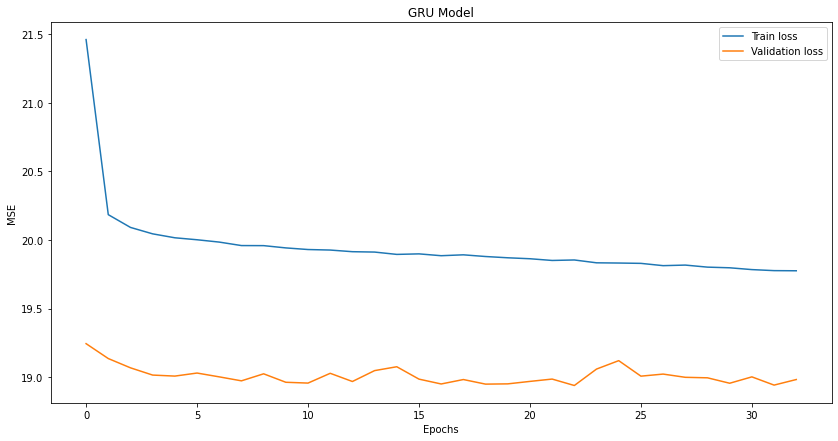

In [23]:
auto_model(8, 64, 33)

Epoch 1/1000
52065/52065 - 357s - loss: 23.0551 - accuracy: 0.6031 - val_loss: 19.4107 - val_accuracy: 0.6029 - 357s/epoch - 7ms/step
Epoch 2/1000
52065/52065 - 343s - loss: 20.2668 - accuracy: 0.6022 - val_loss: 19.2503 - val_accuracy: 0.6206 - 343s/epoch - 7ms/step
Epoch 3/1000
52065/52065 - 341s - loss: 20.1386 - accuracy: 0.6026 - val_loss: 19.0915 - val_accuracy: 0.5974 - 341s/epoch - 7ms/step
Epoch 4/1000
52065/52065 - 335s - loss: 20.0877 - accuracy: 0.6024 - val_loss: 19.0710 - val_accuracy: 0.6007 - 335s/epoch - 6ms/step
Epoch 5/1000
52065/52065 - 335s - loss: 20.0596 - accuracy: 0.6028 - val_loss: 19.0582 - val_accuracy: 0.6076 - 335s/epoch - 6ms/step
Epoch 6/1000
52065/52065 - 336s - loss: 20.0164 - accuracy: 0.6041 - val_loss: 19.1562 - val_accuracy: 0.6057 - 336s/epoch - 6ms/step
Epoch 7/1000
52065/52065 - 337s - loss: 20.0112 - accuracy: 0.6051 - val_loss: 19.0291 - val_accuracy: 0.6131 - 337s/epoch - 6ms/step
Epoch 8/1000
52065/52065 - 337s - loss: 19.9973 - accuracy: 0.

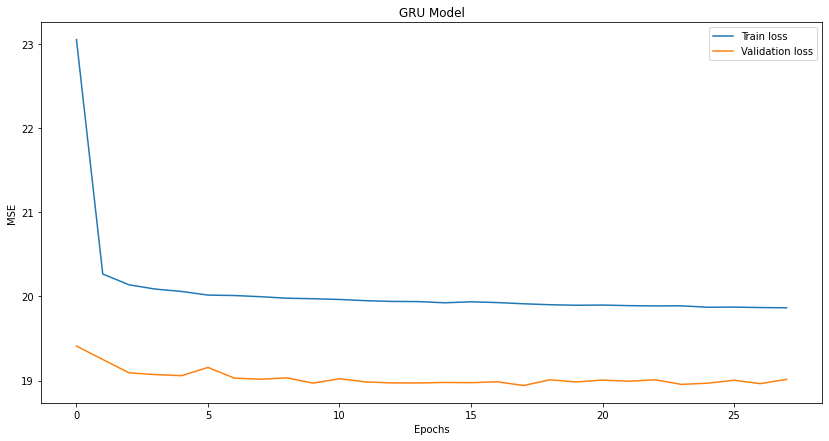

In [24]:
auto_model(8, 32, 33)

Epoch 1/1000
52065/52065 - 311s - loss: 25.7428 - accuracy: 0.5875 - val_loss: 19.8901 - val_accuracy: 0.6107 - 311s/epoch - 6ms/step
Epoch 2/1000
52065/52065 - 307s - loss: 20.4800 - accuracy: 0.6060 - val_loss: 19.4198 - val_accuracy: 0.6105 - 307s/epoch - 6ms/step
Epoch 3/1000
52065/52065 - 301s - loss: 20.2527 - accuracy: 0.6048 - val_loss: 19.2657 - val_accuracy: 0.6074 - 301s/epoch - 6ms/step
Epoch 4/1000
52065/52065 - 295s - loss: 20.1771 - accuracy: 0.6019 - val_loss: 19.1890 - val_accuracy: 0.6107 - 295s/epoch - 6ms/step
Epoch 5/1000
52065/52065 - 295s - loss: 20.1297 - accuracy: 0.6008 - val_loss: 19.1057 - val_accuracy: 0.6007 - 295s/epoch - 6ms/step
Epoch 6/1000
52065/52065 - 296s - loss: 20.0947 - accuracy: 0.6012 - val_loss: 19.1110 - val_accuracy: 0.6038 - 296s/epoch - 6ms/step
Epoch 7/1000
52065/52065 - 297s - loss: 20.0634 - accuracy: 0.6004 - val_loss: 19.0353 - val_accuracy: 0.6052 - 297s/epoch - 6ms/step
Epoch 8/1000
52065/52065 - 291s - loss: 20.0451 - accuracy: 0.

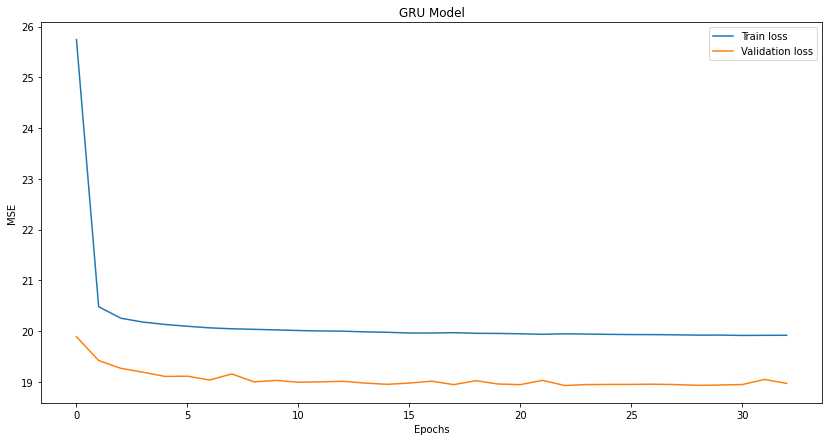

In [23]:
auto_model(8, 16, 33)

In [26]:
auto_model(8, 8, 33)

Epoch 1/1000
52065/52065 - 297s - loss: 29.1810 - accuracy: 0.5855 - val_loss: 21.4237 - val_accuracy: 0.6085 - 297s/epoch - 6ms/step
Epoch 2/1000
52065/52065 - 294s - loss: 21.3756 - accuracy: 0.6095 - val_loss: 19.9721 - val_accuracy: 0.6129 - 294s/epoch - 6ms/step
Epoch 3/1000
52065/52065 - 303s - loss: 20.6605 - accuracy: 0.6110 - val_loss: 19.6288 - val_accuracy: 0.6115 - 303s/epoch - 6ms/step
Epoch 4/1000
52065/52065 - 297s - loss: 20.4678 - accuracy: 0.6106 - val_loss: 19.5190 - val_accuracy: 0.6172 - 297s/epoch - 6ms/step
Epoch 5/1000
52065/52065 - 295s - loss: 20.3864 - accuracy: 0.6085 - val_loss: 19.4255 - val_accuracy: 0.6112 - 295s/epoch - 6ms/step
Epoch 6/1000
52065/52065 - 291s - loss: 20.3213 - accuracy: 0.6074 - val_loss: 19.4021 - val_accuracy: 0.6089 - 291s/epoch - 6ms/step
Epoch 7/1000
52065/52065 - 291s - loss: 20.2676 - accuracy: 0.6064 - val_loss: 19.2924 - val_accuracy: 0.6150 - 291s/epoch - 6ms/step
Epoch 8/1000
52065/52065 - 294s - loss: 20.2049 - accuracy: 0.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-b2ca74d6aba3>", line 1, in <module>
    auto_model(8, 8, 33)
  File "<ipython-input-22-131a2bcbfcd8>", line 19, in auto_model
    callbacks=[early_stop])
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1384, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensor

KeyboardInterrupt: ignored

# bs8_fm35

In [ ]:
first_month = 35
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set (360980, 12)
Validation set (40109, 12)
Train set reshaped (360980, 12, 1)
Validation set reshaped (40109, 12, 1)


In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
45123/45123 - 251s - loss: 21.4701 - accuracy: 0.6020 - val_loss: 19.3889 - val_accuracy: 0.5989 - 251s/epoch - 6ms/step
Epoch 2/1000
45123/45123 - 250s - loss: 19.7223 - accuracy: 0.6028 - val_loss: 19.5077 - val_accuracy: 0.6044 - 250s/epoch - 6ms/step
Epoch 3/1000
45123/45123 - 250s - loss: 19.6147 - accuracy: 0.6044 - val_loss: 19.1621 - val_accuracy: 0.6118 - 250s/epoch - 6ms/step
Epoch 4/1000
45123/45123 - 249s - loss: 19.5489 - accuracy: 0.6052 - val_loss: 19.1941 - val_accuracy: 0.6088 - 249s/epoch - 6ms/step
Epoch 5/1000
45123/45123 - 249s - loss: 19.5115 - accuracy: 0.6076 - val_loss: 19.1594 - val_accuracy: 0.6174 - 249s/epoch - 6ms/step
Epoch 6/1000
45123/45123 - 249s - loss: 19.4966 - accuracy: 0.6079 - val_loss: 19.1285 - val_accuracy: 0.6150 - 249s/epoch - 6ms/step
Epoch 7/1000
45123/45123 - 249s - loss: 19.4555 - accuracy: 0.6093 - val_loss: 19.0799 - val_accuracy: 0.6162 - 249s/epoch - 6ms/step
Epoch 8/1000
45123/45123 - 249s - loss: 19.4369 - accuracy: 0.

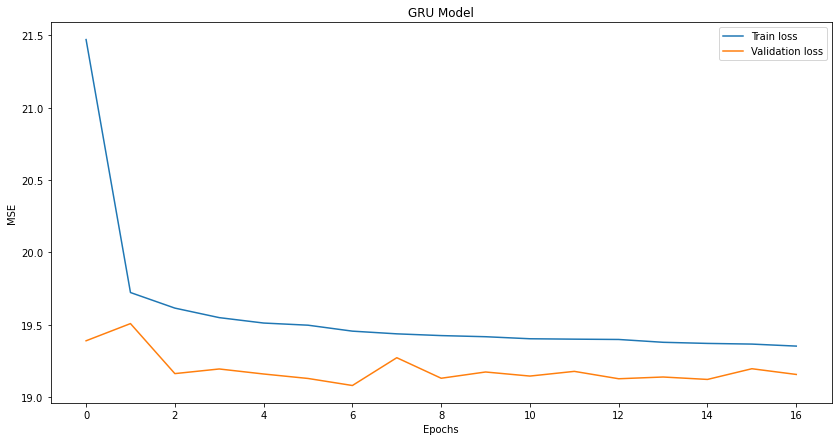

In [ ]:
auto_model(8, 64, 35)

Epoch 1/1000
45123/45123 - 233s - loss: 23.1511 - accuracy: 0.6018 - val_loss: 19.4994 - val_accuracy: 0.6137 - 233s/epoch - 5ms/step
Epoch 2/1000
45123/45123 - 234s - loss: 19.7633 - accuracy: 0.6042 - val_loss: 19.3013 - val_accuracy: 0.6075 - 234s/epoch - 5ms/step
Epoch 3/1000
45123/45123 - 237s - loss: 19.6404 - accuracy: 0.6025 - val_loss: 19.1743 - val_accuracy: 0.6110 - 237s/epoch - 5ms/step
Epoch 4/1000
45123/45123 - 239s - loss: 19.5899 - accuracy: 0.6022 - val_loss: 19.1402 - val_accuracy: 0.6053 - 239s/epoch - 5ms/step
Epoch 5/1000
45123/45123 - 237s - loss: 19.5419 - accuracy: 0.6026 - val_loss: 19.1167 - val_accuracy: 0.6039 - 237s/epoch - 5ms/step
Epoch 6/1000
45123/45123 - 237s - loss: 19.5244 - accuracy: 0.6044 - val_loss: 19.1097 - val_accuracy: 0.6136 - 237s/epoch - 5ms/step
Epoch 7/1000
45123/45123 - 233s - loss: 19.4977 - accuracy: 0.6058 - val_loss: 19.1131 - val_accuracy: 0.6077 - 233s/epoch - 5ms/step
Epoch 8/1000
45123/45123 - 234s - loss: 19.4848 - accuracy: 0.

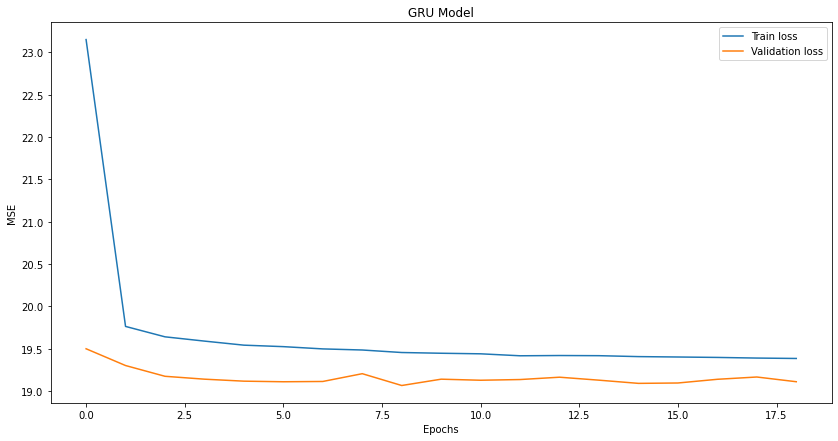

In [ ]:
auto_model(8, 32, 35)

Epoch 1/1000
52065/52065 - 235s - loss: 26.0338 - accuracy: 0.5889 - val_loss: 19.9544 - val_accuracy: 0.6069 - 235s/epoch - 5ms/step
Epoch 2/1000
52065/52065 - 252s - loss: 20.5386 - accuracy: 0.6065 - val_loss: 19.3927 - val_accuracy: 0.5919 - 252s/epoch - 5ms/step
Epoch 3/1000
52065/52065 - 260s - loss: 20.2823 - accuracy: 0.6048 - val_loss: 19.2875 - val_accuracy: 0.6004 - 260s/epoch - 5ms/step
Epoch 4/1000
52065/52065 - 261s - loss: 20.2014 - accuracy: 0.6018 - val_loss: 19.1692 - val_accuracy: 0.6043 - 261s/epoch - 5ms/step
Epoch 5/1000
52065/52065 - 262s - loss: 20.1536 - accuracy: 0.6013 - val_loss: 19.1295 - val_accuracy: 0.6032 - 262s/epoch - 5ms/step
Epoch 6/1000
52065/52065 - 256s - loss: 20.1151 - accuracy: 0.6000 - val_loss: 19.2011 - val_accuracy: 0.6080 - 256s/epoch - 5ms/step
Epoch 7/1000
52065/52065 - 258s - loss: 20.0915 - accuracy: 0.5993 - val_loss: 19.0871 - val_accuracy: 0.5983 - 258s/epoch - 5ms/step
Epoch 8/1000
52065/52065 - 257s - loss: 20.0675 - accuracy: 0.

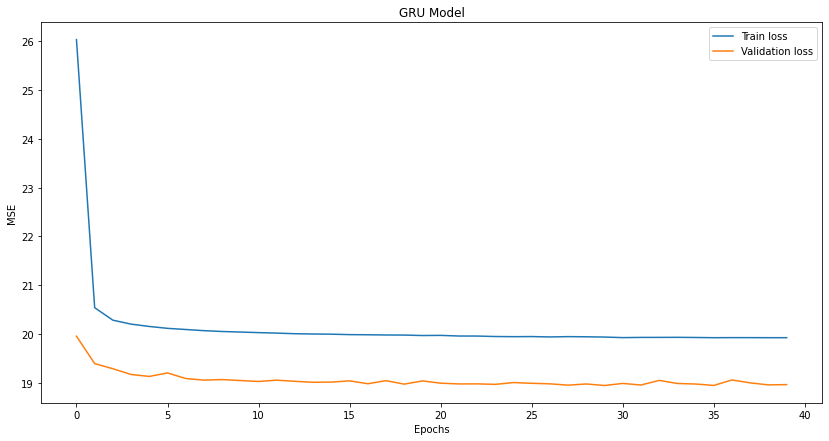

In [ ]:
auto_model(8, 16, 35)

Epoch 1/1000
52065/52065 - 319s - loss: 30.6915 - accuracy: 0.5884 - val_loss: 21.5551 - val_accuracy: 0.6202 - 319s/epoch - 6ms/step
Epoch 2/1000
52065/52065 - 296s - loss: 21.3984 - accuracy: 0.6156 - val_loss: 19.8865 - val_accuracy: 0.6195 - 296s/epoch - 6ms/step
Epoch 3/1000
52065/52065 - 290s - loss: 20.6090 - accuracy: 0.6148 - val_loss: 19.5702 - val_accuracy: 0.6134 - 290s/epoch - 6ms/step
Epoch 4/1000
52065/52065 - 277s - loss: 20.4170 - accuracy: 0.6134 - val_loss: 19.4241 - val_accuracy: 0.6115 - 277s/epoch - 5ms/step
Epoch 5/1000
52065/52065 - 287s - loss: 20.3334 - accuracy: 0.6120 - val_loss: 19.3377 - val_accuracy: 0.6146 - 287s/epoch - 6ms/step
Epoch 6/1000
52065/52065 - 291s - loss: 20.2870 - accuracy: 0.6111 - val_loss: 19.3102 - val_accuracy: 0.6132 - 291s/epoch - 6ms/step
Epoch 7/1000
52065/52065 - 289s - loss: 20.2476 - accuracy: 0.6104 - val_loss: 19.2632 - val_accuracy: 0.6102 - 289s/epoch - 6ms/step
Epoch 8/1000
52065/52065 - 287s - loss: 20.2085 - accuracy: 0.

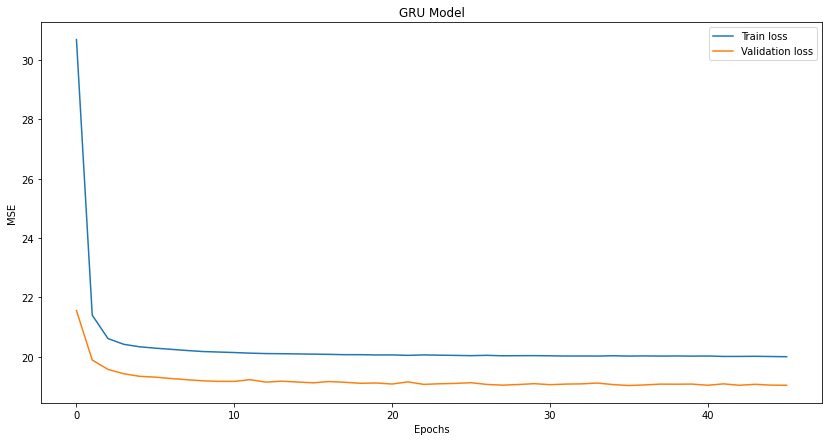

In [ ]:
auto_model(8, 8, 35)

# bs8_fm0

In [ ]:
first_month = 0
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

NameError: ignored

In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

In [ ]:
auto_model(8, 8, 0) # failed

Epoch 1/1000
166607/166607 - 1006s - loss: 30.7253 - accuracy: 0.5518 - val_loss: 26.4153 - val_accuracy: 0.5613 - 1006s/epoch - 6ms/step
Epoch 2/1000
166607/166607 - 1039s - loss: 26.4888 - accuracy: 0.5625 - val_loss: 26.2329 - val_accuracy: 0.5639 - 1039s/epoch - 6ms/step
Epoch 3/1000
166607/166607 - 1044s - loss: 26.3571 - accuracy: 0.5616 - val_loss: 26.1659 - val_accuracy: 0.5631 - 1044s/epoch - 6ms/step
Epoch 4/1000
166607/166607 - 1031s - loss: 26.2959 - accuracy: 0.5609 - val_loss: 26.0904 - val_accuracy: 0.5614 - 1031s/epoch - 6ms/step
Epoch 5/1000
166607/166607 - 1025s - loss: 26.2667 - accuracy: 0.5592 - val_loss: 26.1172 - val_accuracy: 0.5673 - 1025s/epoch - 6ms/step
Epoch 6/1000
166607/166607 - 1048s - loss: 26.2383 - accuracy: 0.5579 - val_loss: 26.0927 - val_accuracy: 0.5585 - 1048s/epoch - 6ms/step
Epoch 7/1000
166607/166607 - 1047s - loss: 26.2288 - accuracy: 0.5577 - val_loss: 26.0813 - val_accuracy: 0.5570 - 1047s/epoch - 6ms/step
Epoch 8/1000
166607/166607 - 1084s

KeyboardInterrupt: ignored

Epoch 1/1000
10413/10413 - 76s - loss: 49.5743 - accuracy: 0.5156 - val_loss: 37.7085 - val_accuracy: 0.5687 - 76s/epoch - 7ms/step
Epoch 2/1000
10413/10413 - 74s - loss: 33.0567 - accuracy: 0.5689 - val_loss: 29.2722 - val_accuracy: 0.5664 - 74s/epoch - 7ms/step
Epoch 3/1000
10413/10413 - 76s - loss: 28.2525 - accuracy: 0.5693 - val_loss: 27.1282 - val_accuracy: 0.5710 - 76s/epoch - 7ms/step
Epoch 4/1000
10413/10413 - 73s - loss: 27.0399 - accuracy: 0.5699 - val_loss: 26.6054 - val_accuracy: 0.5674 - 73s/epoch - 7ms/step
Epoch 5/1000
10413/10413 - 70s - loss: 26.7050 - accuracy: 0.5691 - val_loss: 26.4474 - val_accuracy: 0.5680 - 70s/epoch - 7ms/step
Epoch 6/1000
10413/10413 - 71s - loss: 26.5676 - accuracy: 0.5681 - val_loss: 26.3707 - val_accuracy: 0.5668 - 71s/epoch - 7ms/step
Epoch 7/1000
10413/10413 - 70s - loss: 26.4953 - accuracy: 0.5672 - val_loss: 26.3265 - val_accuracy: 0.5669 - 70s/epoch - 7ms/step
Epoch 8/1000
10413/10413 - 72s - loss: 26.4440 - accuracy: 0.5655 - val_loss

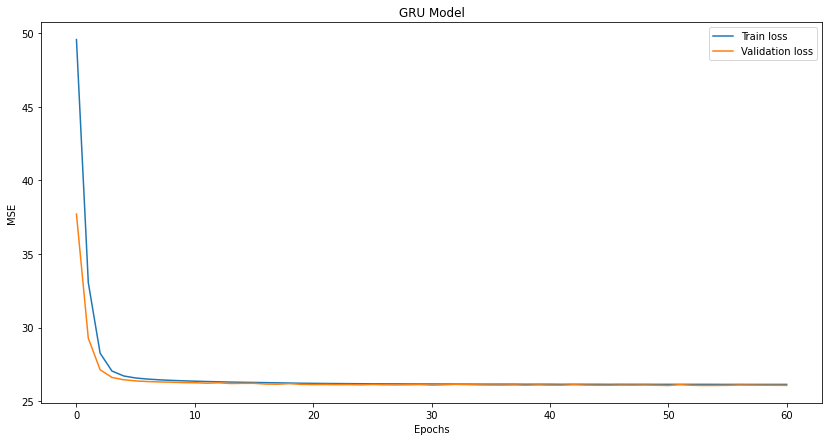

In [ ]:
# with 0 month
auto_model(128, 8, 0)
# auto_model(8, 16, 0)
# auto_model(8, 32, 0)
# auto_model(8, 64, 0)

# bs8_fm46

In [ ]:
first_month = 46
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

NameError: ignored

In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
6942/6942 - 43s - loss: 46.2249 - accuracy: 0.4251 - val_loss: 40.2586 - val_accuracy: 0.5826 - 43s/epoch - 6ms/step
Epoch 2/1000
6942/6942 - 40s - loss: 33.5696 - accuracy: 0.5987 - val_loss: 32.5022 - val_accuracy: 0.5787 - 40s/epoch - 6ms/step
Epoch 3/1000
6942/6942 - 41s - loss: 28.3086 - accuracy: 0.6017 - val_loss: 28.3943 - val_accuracy: 0.5800 - 41s/epoch - 6ms/step
Epoch 4/1000
6942/6942 - 40s - loss: 25.2278 - accuracy: 0.6045 - val_loss: 25.9287 - val_accuracy: 0.5830 - 40s/epoch - 6ms/step
Epoch 5/1000
6942/6942 - 40s - loss: 23.2995 - accuracy: 0.6056 - val_loss: 24.3896 - val_accuracy: 0.5853 - 40s/epoch - 6ms/step
Epoch 6/1000
6942/6942 - 41s - loss: 22.0466 - accuracy: 0.6076 - val_loss: 23.3937 - val_accuracy: 0.5855 - 41s/epoch - 6ms/step
Epoch 7/1000
6942/6942 - 40s - loss: 21.2172 - accuracy: 0.6088 - val_loss: 22.7495 - val_accuracy: 0.5899 - 40s/epoch - 6ms/step
Epoch 8/1000
6942/6942 - 41s - loss: 20.6350 - accuracy: 0.6099 - val_loss: 22.2718 - val_

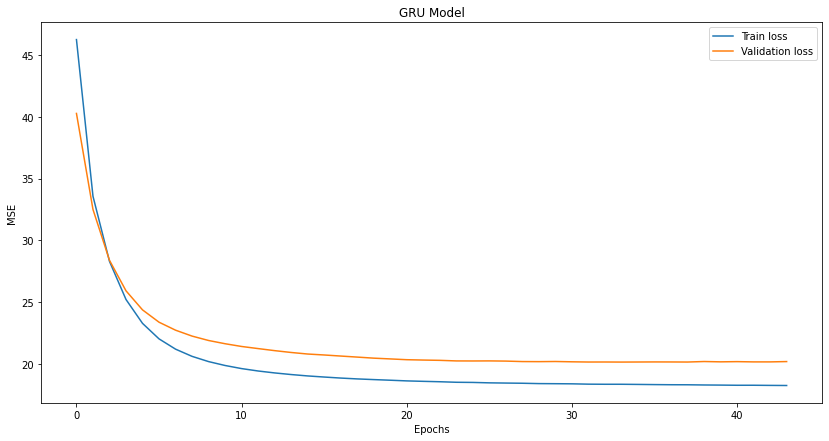

Epoch 1/1000
6942/6942 - 47s - loss: 38.0984 - accuracy: 0.5209 - val_loss: 32.1246 - val_accuracy: 0.5913 - 47s/epoch - 7ms/step
Epoch 2/1000
6942/6942 - 43s - loss: 26.9055 - accuracy: 0.6215 - val_loss: 26.1464 - val_accuracy: 0.5947 - 43s/epoch - 6ms/step
Epoch 3/1000
6942/6942 - 43s - loss: 22.9408 - accuracy: 0.6210 - val_loss: 23.4630 - val_accuracy: 0.5954 - 43s/epoch - 6ms/step
Epoch 4/1000
6942/6942 - 43s - loss: 21.0064 - accuracy: 0.6182 - val_loss: 22.1242 - val_accuracy: 0.5926 - 43s/epoch - 6ms/step
Epoch 5/1000
6942/6942 - 42s - loss: 19.9842 - accuracy: 0.6142 - val_loss: 21.4172 - val_accuracy: 0.5918 - 42s/epoch - 6ms/step
Epoch 6/1000
6942/6942 - 43s - loss: 19.4069 - accuracy: 0.6103 - val_loss: 21.0032 - val_accuracy: 0.5899 - 43s/epoch - 6ms/step
Epoch 7/1000
6942/6942 - 42s - loss: 19.0742 - accuracy: 0.6098 - val_loss: 20.7749 - val_accuracy: 0.5887 - 42s/epoch - 6ms/step
Epoch 8/1000
6942/6942 - 44s - loss: 18.8587 - accuracy: 0.6108 - val_loss: 20.6150 - val_

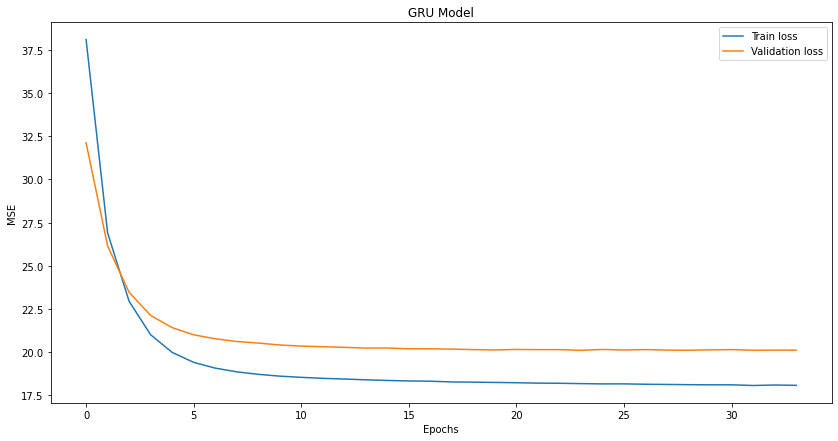

Epoch 1/1000
6942/6942 - 47s - loss: 36.2954 - accuracy: 0.5143 - val_loss: 26.5287 - val_accuracy: 0.5946 - 47s/epoch - 7ms/step
Epoch 2/1000
6942/6942 - 44s - loss: 22.1476 - accuracy: 0.6100 - val_loss: 22.0906 - val_accuracy: 0.5860 - 44s/epoch - 6ms/step
Epoch 3/1000
6942/6942 - 44s - loss: 19.7293 - accuracy: 0.6072 - val_loss: 20.9614 - val_accuracy: 0.5886 - 44s/epoch - 6ms/step
Epoch 4/1000
6942/6942 - 44s - loss: 18.9827 - accuracy: 0.6085 - val_loss: 20.4891 - val_accuracy: 0.5853 - 44s/epoch - 6ms/step
Epoch 5/1000
6942/6942 - 44s - loss: 18.6765 - accuracy: 0.6076 - val_loss: 20.3895 - val_accuracy: 0.5936 - 44s/epoch - 6ms/step
Epoch 6/1000
6942/6942 - 44s - loss: 18.5297 - accuracy: 0.6063 - val_loss: 20.2755 - val_accuracy: 0.5826 - 44s/epoch - 6ms/step
Epoch 7/1000
6942/6942 - 45s - loss: 18.4378 - accuracy: 0.6059 - val_loss: 20.2920 - val_accuracy: 0.5856 - 45s/epoch - 6ms/step
Epoch 8/1000
6942/6942 - 45s - loss: 18.3862 - accuracy: 0.6047 - val_loss: 20.2642 - val_

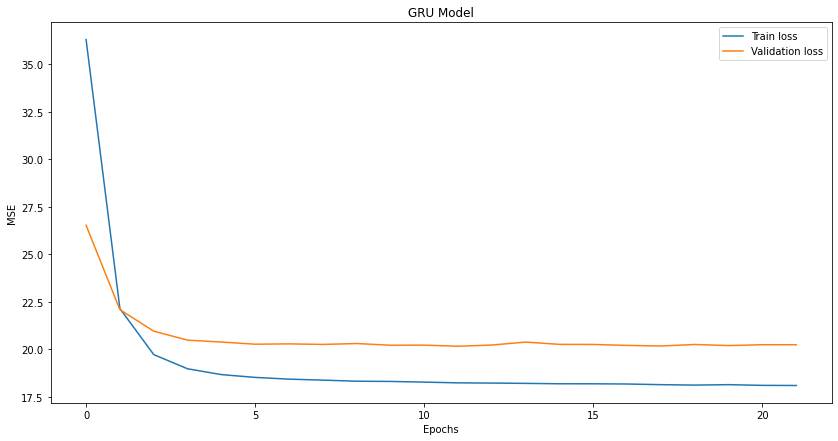

Epoch 1/1000
6942/6942 - 52s - loss: 25.5312 - accuracy: 0.6099 - val_loss: 21.5740 - val_accuracy: 0.5819 - 52s/epoch - 7ms/step
Epoch 2/1000
6942/6942 - 47s - loss: 19.2414 - accuracy: 0.6076 - val_loss: 20.5259 - val_accuracy: 0.5822 - 47s/epoch - 7ms/step
Epoch 3/1000
6942/6942 - 48s - loss: 18.6651 - accuracy: 0.6091 - val_loss: 20.3886 - val_accuracy: 0.5962 - 48s/epoch - 7ms/step
Epoch 4/1000
6942/6942 - 47s - loss: 18.4763 - accuracy: 0.6091 - val_loss: 20.3039 - val_accuracy: 0.5762 - 47s/epoch - 7ms/step
Epoch 5/1000
6942/6942 - 48s - loss: 18.4138 - accuracy: 0.6058 - val_loss: 20.2526 - val_accuracy: 0.5835 - 48s/epoch - 7ms/step
Epoch 6/1000
6942/6942 - 49s - loss: 18.3341 - accuracy: 0.6052 - val_loss: 20.2484 - val_accuracy: 0.5861 - 49s/epoch - 7ms/step
Epoch 7/1000
6942/6942 - 48s - loss: 18.2914 - accuracy: 0.6023 - val_loss: 20.2556 - val_accuracy: 0.5882 - 48s/epoch - 7ms/step
Epoch 8/1000
6942/6942 - 47s - loss: 18.2512 - accuracy: 0.6023 - val_loss: 20.2080 - val_

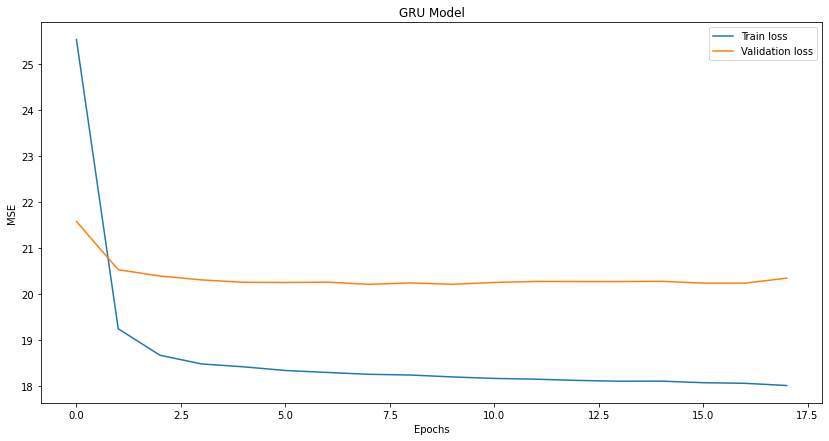

In [ ]:
# with 46 month
auto_model(8, 8)
auto_model(8, 16)
auto_model(8, 32)
auto_model(8, 64)

In [ ]:
# save model to single file
# gru_model.save('gru_model.h5')

# DF 2017 - 2021 non kg

In [ ]:
train_monthly = df_non_kg[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt > 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

month_year kodejenis        barcode  qty_cnt  qty_cnt_month
0           0     10101  4902430600859     2.00            NaN
1           0     10101  4902430601191     4.00           2.00
2           0     10101  4902430601238     4.00           1.00
3           0     10101  4902430601245     8.00            NaN
4           0     10101  4902430601320     1.00           1.00

In [ ]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_year barcode kodejenis    0    1    2    3    4    5    6    7    8  \
0            00204  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1            00205  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2            00206  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3            00207  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4            00209  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

month_year    9   10   11   12   13   14   15    16   17    18    19    20  \
0          0.00 0.00 0.00 2.00 3.00 5.00 7.00 11.00 3.00  0.00  9.00 10.00   
1          0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00  1.00  0.00  0.00   
2          0.00 0.00 0.00 0.00 1.00 0.00 1.00  8.00 8.00 12.00 13.00  7.00   
3          0.00 0.00 0.00 0.00 8.00 6.00 5.00  8.00 4.00 18.00 13.00  6.00   
4          0.00 0.00 0.00 0.00 0.00 0.00 0.00  1.00 6.00  2.00  7.00  4.00   

month_year    21   22    23    24  25   26    27    28    29    30  31    32  \
0          15.00 8.00  5.00  3.00   0 4.00  2.00  7.00 14.00  1.00   2  0.00   
1           0.00 4.00 19.00 14.00  18 6.00 12.00 16.00 13.00 14.00  24 29.00   
2          10.00 4.00 16.00  5.00   7 7.00  8.00  1.00  4.00  3.00  13 10.00   
3           5.00 5.00 13.00  9.00   2 3.00  9.00  8.00  3.00  2.00   1  5.00   
4           2.00 2.00  3.00  1.00   3 1.00  7.00 13.00  5.00  2.00   1  6.00   

month_year    33    34  35  36    37  38    39    40    41    42   43   44  \
0           1.00  2.00   0   1  6.00   9  5.00  1.00  2.00  1.00 0.00 0.00   
1          33.00 25.00  27  17 30.00  16 11.00 13.00 14.00 18.00 0.00 0.00   
2          11.00  8.00  10  11 11.00   9  2.00  7.00  1.00  4.00 0.00 0.00   
3           3.00  5.00   7   5  1.00   1  3.00  0.00  0.00  0.00 0.00 0.00   
4           2.00  6.00   5   4  3.00   3  0.00  0.00  0.00  0.00 0.00 0.00   

month_year   45   46   47   48   49  50  51   52  53  54  55   56  57   58  \
0          0.00 0.00 0.00 0.00 0.00   0   0 0.00   0   0   0 0.00   0 0.00   
1          0.00 0.00 0.00 0.00 0.00   0   0 0.00   0   0   0 0.00   0 0.00   
2          0.00 0.00 0.00 0.00 0.00   0   0 0.00   0   0   0 0.00   0 0.00   
3          0.00 0.00 0.00 0.00 0.00   0   0 0.00   0   0   0 0.00   0 0.00   
4          0.00 0.00 0.00 0.00 0.00   0   0 0.00   0   0   0 0.00   0 0.00   

month_year   59  
0          0.00  
1          0.00  
2          0.00  
3          0.00  
4          0.00

In [ ]:
# first_month = 47
first_month = 0
last_month = 59
# first_month = 34
# last_month = 47
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['barcode'], row['kodejenis']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['barcode', 'kodejenis']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

barcode kodejenis    0    1    2    3    4    5    6    7    8    9   10  \
0   00204  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1   00204  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2   00204  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00   
3   00204  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00 3.00   
4   00204  JB000075 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00 3.00 5.00   

    11  label  
0 0.00   2.00  
1 2.00   3.00  
2 3.00   5.00  
3 5.00   7.00  
4 7.00  11.00

In [ ]:
data_series = data_series.drop(['barcode', 'kodejenis'], axis=1)

In [ ]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [ ]:
print("Train set", train.shape)
print("Validation set", valid.shape)
train.head()

Train set (2007201, 12)
Validation set (223023, 12)


0    1    2    3     4     5     6     7     8     9    10    11
2138045 0.00 0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
517116  5.00 6.00 3.00 8.00  4.00  4.00  4.00  3.00  5.00  9.00  5.00  5.00
1737112 0.00 0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
1779404 0.00 0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
2066852 0.00 0.00 0.00 0.00 26.00 24.00 25.00 30.00 32.00 28.00 20.00 30.00

In [ ]:
# scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(-1, 1))
# x_train_scaled = scaler.fit_transform(train)
# x_valid_scaled = scaler.fit_transform(valid)

In [ ]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))
# X_train = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
# X_valid = x_valid_scaled.reshape((x_valid_scaled.shape[0], x_valid_scaled.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)
# print(X_train)

# initial value count
# Train set reshaped (40697, 12, 1)
# Validation set reshaped (4522, 12, 1)

Train set reshaped (2007201, 12, 1)
Validation set reshaped (223023, 12, 1)


In [ ]:
def auto_model(batch, neuron):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  
  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

In [ ]:
auto_model(64, 8)
# auto_model(64, 32)

Epoch 1/1000
31363/31363 - 177s - loss: 27.7511 - accuracy: 0.6721 - val_loss: 21.2027 - val_accuracy: 0.7033 - 177s/epoch - 6ms/step
Epoch 2/1000
31363/31363 - 181s - loss: 20.2068 - accuracy: 0.7024 - val_loss: 20.0298 - val_accuracy: 0.6989 - 181s/epoch - 6ms/step
Epoch 3/1000
31363/31363 - 179s - loss: 19.7086 - accuracy: 0.6955 - val_loss: 19.8190 - val_accuracy: 0.6950 - 179s/epoch - 6ms/step
Epoch 4/1000
31363/31363 - 184s - loss: 19.6072 - accuracy: 0.6949 - val_loss: 19.7624 - val_accuracy: 0.6918 - 184s/epoch - 6ms/step
Epoch 5/1000
31363/31363 - 184s - loss: 19.5622 - accuracy: 0.6958 - val_loss: 19.7185 - val_accuracy: 0.6981 - 184s/epoch - 6ms/step
Epoch 6/1000
31363/31363 - 181s - loss: 19.5363 - accuracy: 0.6962 - val_loss: 19.7013 - val_accuracy: 0.6999 - 181s/epoch - 6ms/step
Epoch 7/1000
31363/31363 - 187s - loss: 19.5181 - accuracy: 0.6966 - val_loss: 19.6678 - val_accuracy: 0.6979 - 187s/epoch - 6ms/step
Epoch 8/1000
31363/31363 - 185s - loss: 19.5041 - accuracy: 0.

# DF 2017 - 2021 kg

In [ ]:
train_monthly = df_kg[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt > 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

In [ ]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

In [ ]:
monthly_series_drop = monthly_series.drop(['kodejenis'], axis=1)

In [ ]:
summed_data = monthly_series_drop.groupby('barcode').agg('sum').reset_index(False)
summed_data.head()

In [ ]:
# first_month = 47
first_month = 0
last_month = 59
# first_month = 34
# last_month = 47
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

In [ ]:
data_series = data_series.drop(['barcode'], axis=1)

In [ ]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [ ]:
print("Train set", train.shape)
print("Validation set", valid.shape)
train.head()

In [ ]:
# scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(-1, 1))
# x_train_scaled = scaler.fit_transform(train)
# x_valid_scaled = scaler.fit_transform(valid)

In [ ]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))
# X_train = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
# X_valid = x_valid_scaled.reshape((x_valid_scaled.shape[0], x_valid_scaled.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)
# print(X_train)

# initial value count
# Train set reshaped (40697, 12, 1)
# Validation set reshaped (4522, 12, 1)

In [ ]:
def auto_model(batch, neuron):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  
  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

In [ ]:
auto_model(64, 8)
# auto_model(64, 32)

# EDA

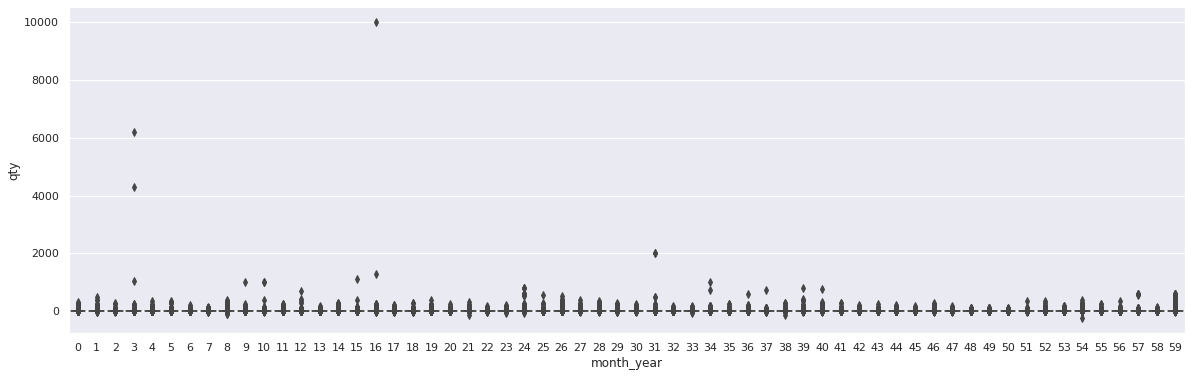

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_year', y='qty', data=df_non_kg)

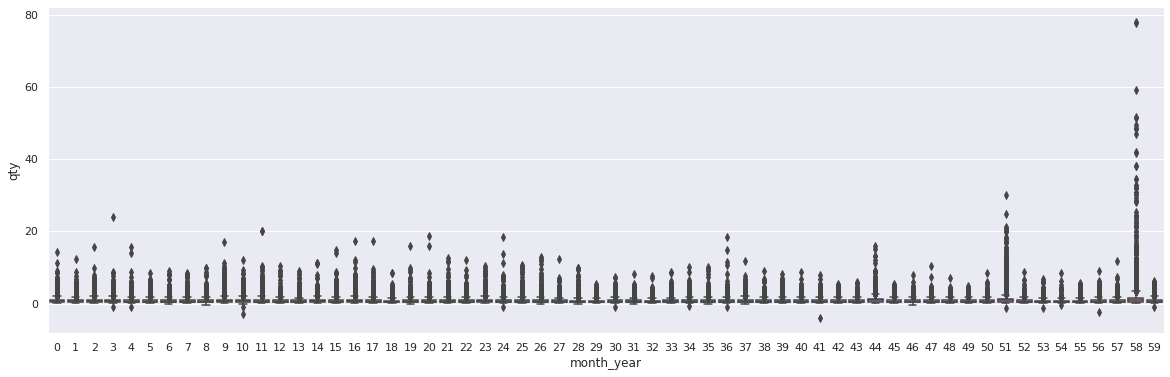

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_year', y='qty', data=df_kg)

# Test - web fix

In [ ]:
# data preprocessing for prediction january 2022

testing = df2021.copy()

testing['month_year'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_year'] = testing['month_year'].map({'01-21':0,'02-21':1,'03-21':2,'04-21':3,'05-21':4,'06-21':5,'07-21':6,'08-21':7,'09-21':8,'10-21':9,'11-21':10,'12-21':11})
# testing['month_year'] = testing['month_year'].map({'01-21':'Januari','02-21':'Februari','03-21':'Maret','04-21':'April','05-21':'Mei','06-21':'Juni','07-21':'Juli','08-21':'Agustus','09-21':'September','10-21':"Oktober",'11-21':'November','12-21':'Desember'})

test_monthly = testing[['tgl', 'month_year', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_year', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [ ]:
# display(test_monthly_series.nunique())
display(test_monthly_series.head())

month_year   barcode     0    1    2    3    4    5    6     7    8    9   10  \
0           00100809  7.23 3.75 5.23 5.37 4.12 2.11 2.75  5.56 4.12 3.13 1.68   
1           00113731  0.00 0.00 0.00 0.00 0.00 0.00 0.95  0.75 0.78 0.45 1.72   
2           00129213 38.39 0.00 1.95 0.40 0.00 0.00 0.00  0.00 0.00 0.00 0.00   
3           00133173  0.00 0.00 0.00 0.00 0.00 0.00 0.00 47.26 0.00 0.00 0.00   
4           00133210  0.00 0.00 0.00 1.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00   

month_year   11  
0          3.59  
1          0.32  
2          0.00  
3          0.00  
4          0.00

In [ ]:
# data preprocessing for prediction february 2022

testing_pred = df2022.copy()

testing_pred = testing_pred.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

testing_pred['month_year'] = testing_pred['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing_pred['month_year'] = testing_pred['month_year'].map({'01-22':0,'02-22':1})

testing_monthly_pred = testing_pred[['tgl', 'month_year', 'barcode', 'qty']]
testing_monthly_pred = testing_monthly_pred.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
testing_monthly_pred = testing_monthly_pred.agg({'qty':['sum']})
testing_monthly_pred.columns = ['month_year', 'barcode', 'qty_cnt']
testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
testing_monthly_pred['qty_cnt_month'] = testing_monthly_pred.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

testing_monthly_series_pred = testing_monthly_pred.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [ ]:
print(f"Min date from data set: {testing_pred['tgl'].min().date()}")
print(f"Max date from data set: {testing_pred['tgl'].max().date()}")
print("Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1")

Min date from data set: 2022-01-01
Max date from data set: 2022-03-01
Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1


In [ ]:
testing_monthly_series_pred.head()

month_year   barcode   0.0   1.0
0           00100809  5.67  2.89
1           00113731  0.87  0.00
2           00133241 20.52 36.09
3           00149457  6.05  7.65
4           00149815  8.21 12.49

In [ ]:
pred_list = ['96770', '011747234207', '96842', '97162', '8992933211115', '8999999195670', '00100809', '9557062331128', '97515', '00149457']
df_pred_list = df[df['barcode'].isin(pred_list)].reset_index(drop=True)

In [ ]:
df_pred_grouped = df_pred_list.groupby(["barcode", "namabarang"]).size().reset_index().rename(columns={0:'count'})
product_list = df_pred_grouped['barcode'].to_list()
namabarang = df_pred_grouped['namabarang'].to_list()

In [ ]:
# get data selected product list from 2021 and 2022 for ploting on website

# product_list = ['011747233057', '011747234207', '055500130221']
# namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

selected_data_2021 = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2021['namabarang'] = namabarang
selected_data_2022['namabarang'] = namabarang
selected_data_2021 = selected_data_2021[['barcode', 'namabarang', 0, 1, 2, 3,  4, 5, 6, 7, 8, 9, 10, 11]]
selected_data_2022 = selected_data_2022[['barcode', 'namabarang', 0, 1]]
selected_data_2021.rename(columns = {0:'Januari', 1:'Februari', 2:'Maret', 3:'April', 4:'Mei', 5:'Juni', 6:'Juli', 7:'Agustus', 8:'September', 9:'Oktober', 10:'November', 11:'Desember'}, inplace = True)
selected_data_2022.rename(columns = {0:'Januari', 1:'Februari'}, inplace = True)
# selected_data_2022.drop(['barcode', 'kodejenis'], axis=1, inplace=True)
# appenned_data = df.append()
# # df_train_raw.to_csv('df_train_raw_new.csv', index=False)
display(selected_data_2021)
display(selected_data_2022)
# display(appenned_data)

month_year        barcode                     namabarang  Januari  Februari  \
0                00100809              KACANG HIJAU / KG     7.23      3.75   
1                00149457                 MELON PUTIH/KG    14.10      1.38   
2            011747234207         DOLPIN GARAM 1000GR*12    17.00      9.00   
3           8992933211115        NUTRIJELL STRAWBERRY 12    16.00     12.00   
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    26.00     18.00   
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    23.00      9.00   
6                   96770                   GELAS CJ-255     9.00      9.00   
7                   96842              SISIR GARPU HITAM     0.00      0.00   
8                   97162              GELAS POLOS HS-9N     6.00     16.00   
9                   97515      MASKING TAPE 2" TBL BERRY     3.00      6.00   

month_year  Maret  April   Mei  Juni  Juli  Agustus  September  Oktober  \
0            5.23   5.37  4.12  2.11  2.75     5.56       4.12     3.13   
1           12.59  11.06  8.71  4.14  8.12     1.13       8.30    13.51   
2           12.00  14.00 12.00 19.00 14.00    15.00      14.00    16.00   
3           23.00  33.00 16.00  9.00 15.00    10.00      12.00    11.00   
4           38.00  21.00 17.00 18.00 21.00    14.00      23.00    18.00   
5           12.00  14.00 20.00 18.00 11.00    12.00      18.00    12.00   
6           16.00   0.00 11.00 13.00  0.00     0.00       5.00     6.00   
7            0.00   4.00  3.00  1.00  2.00     1.00       1.00     0.00   
8           13.00   8.00 16.00 23.00  1.00     0.00       0.00    12.00   
9            0.00   6.00  7.00  1.00  6.00     3.00       0.00     3.00   

month_year  November  Desember  
0               1.68      3.59  
1               9.53      9.14  
2              20.00     24.00  
3               8.00     12.00  
4              17.00     28.00  
5              14.00     26.00  
6               1.00      4.00  
7               0.00      0.00  
8               0.00      8.00  
9               3.00      6.00

month_year        barcode                     namabarang  Januari  Februari
0                00100809              KACANG HIJAU / KG     5.67      2.89
1                00149457                 MELON PUTIH/KG     6.05      7.65
2            011747234207         DOLPIN GARAM 1000GR*12    12.00      8.00
3           8992933211115        NUTRIJELL STRAWBERRY 12     9.00      8.00
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    37.00     38.00
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    17.00     10.00
6                   96770                   GELAS CJ-255     8.00      0.00
7                   96842              SISIR GARPU HITAM     5.00      4.00
8                   97162              GELAS POLOS HS-9N    16.00      4.00
9                   97515      MASKING TAPE 2" TBL BERRY     8.00      4.00

In [ ]:
# selected_data_2021.to_csv('riwayat_pred_jan.csv', index=False)
# selected_data_2021.drop(['Januari'], axis=1, inplace=True)
# selected_data_2021['Januari'] = selected_data_2022['Januari']
# selected_data_2021.to_csv('riwayat_pred_feb.csv', index=False)

In [ ]:
selected_data_2021

month_year        barcode                     namabarang  Januari  Februari  \
0                00100809              KACANG HIJAU / KG     7.23      3.75   
1                00149457                 MELON PUTIH/KG    14.10      1.38   
2            011747234207         DOLPIN GARAM 1000GR*12    17.00      9.00   
3           8992933211115        NUTRIJELL STRAWBERRY 12    16.00     12.00   
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    26.00     18.00   
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    23.00      9.00   
6                   96770                   GELAS CJ-255     9.00      9.00   
7                   96842              SISIR GARPU HITAM     0.00      0.00   
8                   97162              GELAS POLOS HS-9N     6.00     16.00   
9                   97515      MASKING TAPE 2" TBL BERRY     3.00      6.00   

month_year  Maret  April   Mei  Juni  Juli  Agustus  September  Oktober  \
0            5.23   5.37  4.12  2.11  2.75     5.56       4.12     3.13   
1           12.59  11.06  8.71  4.14  8.12     1.13       8.30    13.51   
2           12.00  14.00 12.00 19.00 14.00    15.00      14.00    16.00   
3           23.00  33.00 16.00  9.00 15.00    10.00      12.00    11.00   
4           38.00  21.00 17.00 18.00 21.00    14.00      23.00    18.00   
5           12.00  14.00 20.00 18.00 11.00    12.00      18.00    12.00   
6           16.00   0.00 11.00 13.00  0.00     0.00       5.00     6.00   
7            0.00   4.00  3.00  1.00  2.00     1.00       1.00     0.00   
8           13.00   8.00 16.00 23.00  1.00     0.00       0.00    12.00   
9            0.00   6.00  7.00  1.00  6.00     3.00       0.00     3.00   

month_year  November  Desember  
0               1.68      3.59  
1               9.53      9.14  
2              20.00     24.00  
3               8.00     12.00  
4              17.00     28.00  
5              14.00     26.00  
6               1.00      4.00  
7               0.00      0.00  
8               0.00      8.00  
9               3.00      6.00

In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True) # 2021 data
# df_pred_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True) # 2022 data
# df_pred = df_pred.drop_duplicates(subset=['barcode', 'kodejenis'])
# df_pred.fillna(0, inplace=True)
# df_pred.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_jan = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_jan.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_jan.drop([0], axis=1, inplace=True)
# df_pred_jan.head()
# df_pred_jan.to_csv('df_pred_jan.csv', index=False)

In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_feb = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_feb.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_feb
# df_pred_feb[0]
# df_pred_jan[12] = df_pred_feb[0]
# df_pred_jan
# df_pred_jan.to_csv('df_pred_feb.csv', index=False)

In [ ]:
# df_pred.to_csv('df_pred.csv', index=False)

In [ ]:
jan = pd.read_csv('./riwayat_pred_jan.csv')
feb = pd.read_csv('./riwayat_pred_feb.csv')

In [ ]:
# drop unnecessary column

X_jan = jan.drop_duplicates(subset=['barcode'])
X_jan.fillna(0, inplace=True)
X_jan.drop(['barcode', 'namabarang'], axis=1, inplace=True)

X_feb = feb.drop_duplicates(subset=['barcode'])
X_feb.fillna(0, inplace=True)
X_feb.drop(['barcode', 'namabarang'], axis=1, inplace=True)

In [ ]:
display(X_jan)
display(X_feb)

Januari  Februari  Maret  April   Mei  Juni  Juli  Agustus  September  \
0     7.23      3.75   5.23   5.37  4.12  2.11  2.75     5.56       4.12   
1    14.10      1.38  12.59  11.06  8.71  4.14  8.12     1.13       8.30   
2    17.00      9.00  12.00  14.00 12.00 19.00 14.00    15.00      14.00   
3    16.00     12.00  23.00  33.00 16.00  9.00 15.00    10.00      12.00   
4    26.00     18.00  38.00  21.00 17.00 18.00 21.00    14.00      23.00   
5    23.00      9.00  12.00  14.00 20.00 18.00 11.00    12.00      18.00   
6     9.00      9.00  16.00   0.00 11.00 13.00  0.00     0.00       5.00   
7     0.00      0.00   0.00   4.00  3.00  1.00  2.00     1.00       1.00   
8     6.00     16.00  13.00   8.00 16.00 23.00  1.00     0.00       0.00   
9     3.00      6.00   0.00   6.00  7.00  1.00  6.00     3.00       0.00   

   Oktober  November  Desember  
0     3.13      1.68      3.59  
1    13.51      9.53      9.14  
2    16.00     20.00     24.00  
3    11.00      8.00     12.00  
4    18.00     17.00     28.00  
5    12.00     14.00     26.00  
6     6.00      1.00      4.00  
7     0.00      0.00      0.00  
8    12.00      0.00      8.00  
9     3.00      3.00      6.00

Februari  Maret  April   Mei  Juni  Juli  Agustus  September  Oktober  \
0      3.75   5.23   5.37  4.12  2.11  2.75     5.56       4.12     3.13   
1      1.38  12.59  11.06  8.71  4.14  8.12     1.13       8.30    13.51   
2      9.00  12.00  14.00 12.00 19.00 14.00    15.00      14.00    16.00   
3     12.00  23.00  33.00 16.00  9.00 15.00    10.00      12.00    11.00   
4     18.00  38.00  21.00 17.00 18.00 21.00    14.00      23.00    18.00   
5      9.00  12.00  14.00 20.00 18.00 11.00    12.00      18.00    12.00   
6      9.00  16.00   0.00 11.00 13.00  0.00     0.00       5.00     6.00   
7      0.00   0.00   4.00  3.00  1.00  2.00     1.00       1.00     0.00   
8     16.00  13.00   8.00 16.00 23.00  1.00     0.00       0.00    12.00   
9      6.00   0.00   6.00  7.00  1.00  6.00     3.00       0.00     3.00   

   November  Desember  Januari  
0      1.68      3.59     5.67  
1      9.53      9.14     6.05  
2     20.00     24.00    12.00  
3      8.00     12.00     9.00  
4     17.00     28.00    37.00  
5     14.00     26.00    17.00  
6      1.00      4.00     8.00  
7      0.00      0.00     5.00  
8      0.00      8.00    16.00  
9      3.00      6.00     8.00

In [ ]:
# reshape the predict dataset

X_reshaped_jan = X_jan.values.reshape((X_jan.shape[0], X_jan.shape[1], 1))
display(X_reshaped_jan.shape)

X_reshaped_feb = X_feb.values.reshape((X_feb.shape[0], X_feb.shape[1], 1))
display(X_reshaped_feb.shape)

(10, 12, 1)

(10, 12, 1)

In [ ]:
# gru_model = load_model('gru_model-bs32_hn16_month0.h5')
gru_model = load_model('gru_model-bs32_hn16_month35.h5')

In [ ]:
# predict the dataset

model_pred_jan = gru_model.predict(X_reshaped_jan)
model_pred_feb = gru_model.predict(X_reshaped_feb)

In [ ]:
model_pred_feb

array([[ 3.4239817],
       [ 7.295886 ],
       [14.26775  ],
       [ 9.973657 ],
       [22.985926 ],
       [15.711628 ],
       [ 5.551695 ],
       [ 1.8832347],
       [10.959596 ],
       [ 4.4546347]], dtype=float32)

In [ ]:
# get back the barcode to pairing the prediction

barcode_pred_jan = jan[['barcode', 'namabarang']]
barcode_pred_feb = feb[['barcode', 'namabarang']]

prediction_jan = pd.DataFrame(barcode_pred_jan[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_jan['prediction_january'] = pd.DataFrame(model_pred_jan)
display(prediction_jan)

prediction_feb = pd.DataFrame(barcode_pred_feb[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_feb['prediction_february'] = pd.DataFrame(model_pred_feb)
display(prediction_feb)

# pred.to_csv('gru_submission.csv', index=False)

barcode                     namabarang  prediction_january
0         100809              KACANG HIJAU / KG                3.11
1         149457                 MELON PUTIH/KG                8.31
2    11747234207         DOLPIN GARAM 1000GR*12               17.52
3  8992933211115        NUTRIJELL STRAWBERRY 12               10.86
4  8999999195670    SARIWANGI TB ASLI 100*12 BR               19.69
5  9557062331128  MR.POTATO CRISPS ORG.14*160GR               16.97
6          96770                   GELAS CJ-255                4.52
7          96842              SISIR GARPU HITAM                0.62
8          97162              GELAS POLOS HS-9N                7.51
9          97515      MASKING TAPE 2" TBL BERRY                3.35

barcode                     namabarang  prediction_february
0         100809              KACANG HIJAU / KG                 3.42
1         149457                 MELON PUTIH/KG                 7.30
2    11747234207         DOLPIN GARAM 1000GR*12                14.27
3  8992933211115        NUTRIJELL STRAWBERRY 12                 9.97
4  8999999195670    SARIWANGI TB ASLI 100*12 BR                22.99
5  9557062331128  MR.POTATO CRISPS ORG.14*160GR                15.71
6          96770                   GELAS CJ-255                 5.55
7          96842              SISIR GARPU HITAM                 1.88
8          97162              GELAS POLOS HS-9N                10.96
9          97515      MASKING TAPE 2" TBL BERRY                 4.45

In [ ]:
selected_data_2022

month_year        barcode                     namabarang  Januari  Februari
0                00100809              KACANG HIJAU / KG     5.67      2.89
1                00149457                 MELON PUTIH/KG     6.05      7.65
2            011747234207         DOLPIN GARAM 1000GR*12    12.00      8.00
3           8992933211115        NUTRIJELL STRAWBERRY 12     9.00      8.00
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    37.00     38.00
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    17.00     10.00
6                   96770                   GELAS CJ-255     8.00      0.00
7                   96842              SISIR GARPU HITAM     5.00      4.00
8                   97162              GELAS POLOS HS-9N    16.00      4.00
9                   97515      MASKING TAPE 2" TBL BERRY     8.00      4.00

In [ ]:
pred = prediction_jan["prediction_january"]
# pred = prediction_feb["prediction_february"]

In [ ]:
actual = selected_data_2022['Januari']
# actual = selected_data_2022[1]

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual, pred)

43.86317807850803

In [ ]:
# lstm_train_pred = gru_model.predict(X_train)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))

print('Prediction rmse:', np.sqrt(mean_squared_error(actual, pred)))

Prediction rmse: 6.857002141494836


In [ ]:
# test.to_csv('test_result.csv', index=False)

In [ ]:
# # save the model to disk
# filename = 'gru_model.sav'
# joblib.dump(gru_model, filename)
 
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.predict(X_test, Y_test)
# print(result)

# get data for testing

In [ ]:
pred_list = ['96770', '011747234207', '96842', '089686010015', '8992933211115', '8999999195670', '00100809', '9557062331128', '00133470', '00149457']
df_pred_list = df[df['barcode'].isin(pred_list)].reset_index(drop=True)

In [ ]:
df_pred_list.groupby(["barcode", "namabarang"]).size().reset_index().rename(columns={0:'count'})

barcode                     namabarang  count
0       00100809              KACANG HIJAU / KG   1902
1       00133470                        SAWO/KG   1193
2       00149457                 MELON PUTIH/KG    774
3   011747234207         DOLPIN GARAM 1000GR*12    780
4   089686010015            INDOMIE AYAM BAWANG  11167
5  8992933211115        NUTRIJELL STRAWBERRY 12   1382
6  8999999195670    SARIWANGI TB ASLI 100*12 BR   1754
7  9557062331128  MR.POTATO CRISPS ORG.14*160GR    394
8          96770                   GELAS CJ-255    253
9          96842              SISIR GARPU HITAM    117

In [ ]:
column_values = df_pred_list[["barcode", "namabarang"]].values
unique_values =  np.unique(column_values)

print(unique_values)

['00100809' '00133470' '00149457' '00321181' '011747233057' '011747234207'
 '055500130221' '089686010015' '8992933211115' '8999999195670'
 'DOLPIN GARAM 1000GR*12' 'DUA KELINCI KCG.GRG 10*1000GR'
 'DUA KELINCI KCG.GRG 10*750GR' 'DUA KELINCI KCG.GRG 10*800GR'
 'INDOMIE AYAM BAWANG' 'KACANG HIJAU / KG' 'MELON PUTIH/KG'
 'NUTRIJELL STRAWBERRY 12' 'PEAR HIJAU/KG 12' 'PEAR HIJAU/KG 18'
 'SARIWANGI TB ASLI 100*12 BR' 'SAWO/KG' 'SOS P.LANTAI ORANGE 750ML REFF'
 'SOS P.LANTAI ORANGE 800ML REFF']
